## Convert from nd2 to npz

In [1]:
# Useful starting lines
import cv2
import os
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
import nd2reader
%load_ext autoreload
%autoreload 2
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from pims import ND2_Reader

In [3]:
with ND2_Reader('data/20190708_SJR5.2_w3_s2.nd2') as frames:
    frames.iter_axes = 't'  # 't' is the default already
    frames.bundle_axes = 'yxz'  # when 'z' is available, this will be default
    frames.default_coords['c'] = 1  # 0 is the default setting
    for frame in frames[:3]:
        print(frame)
        

[[[166 143 148 ... 161 157 143]
  [149 163 165 ... 147 161 202]
  [173 167 176 ... 174 169 184]
  ...
  [160 170 174 ... 176 165 148]
  [166 184 175 ... 166 194 164]
  [184 176 183 ... 173 203 160]]

 [[164 188 154 ... 187 162 169]
  [187 151 204 ... 156 207 184]
  [161 168 183 ... 179 169 185]
  ...
  [167 157 170 ... 178 153 182]
  [171 166 176 ... 150 156 189]
  [174 171 159 ... 169 167 146]]

 [[158 137 165 ... 157 180 171]
  [165 180 151 ... 171 167 191]
  [161 172 179 ... 191 171 163]
  ...
  [166 176 181 ... 163 183 160]
  [152 163 203 ... 164 160 178]
  [173 180 164 ... 173 143 171]]

 ...

 [[192 158 187 ... 186 164 157]
  [169 186 165 ... 168 158 145]
  [196 181 156 ... 162 138 143]
  ...
  [192 153 162 ... 232 186 170]
  [167 177 168 ... 184 215 176]
  [175 178 159 ... 206 162 169]]

 [[144 145 185 ... 203 166 166]
  [160 172 152 ... 143 141 183]
  [190 199 153 ... 170 170 188]
  ...
  [178 158 144 ... 176 191 165]
  [157 162 166 ... 214 165 175]
  [177 162 176 ... 203 180 1

C:\Users\jetma\Anaconda3\lib\site-packages\pims\base_frames.py:522: UserWarning: Please call FramesSequenceND.__init__() at the start of thethe reader initialization.
  warn("Please call FramesSequenceND.__init__() at the start of the"


In [4]:
def prep_frames(frames, c=1):
    frames.iter_axes = 't'  # 't' is the default already
    frames.bundle_axes = 'yxz'  # when 'z' is available, this will be default
    frames.default_coords['c'] = c  # 0 is the default setting
    return frames
def export_npz(frames, images_path, c=1):
    framesList = []
    for frame in frames:
        frameArray = np.array(frame)
        framesList.append(frameArray)
    images_path = images_path.replace('.nd2', "_color"+str(c)+".npz")
    np.savez(images_path, framesList)
    return np.array(framesList)

In [5]:
import os
for file in os.listdir("./data"):
    if file.endswith(".nd2"):
        images_path = os.path.join("data", file)
        frames = ND2_Reader(images_path)
        frames = prep_frames(frames, 0)
        export_npz(frames, images_path, 0)
        frames = prep_frames(frames, 1)
        export_npz(frames, images_path, 1)
        print("[Success] {} succesfully saved to npz ! ".format(images_path))

KeyboardInterrupt: 

In [6]:
import os
for file in os.listdir("./data"):
    if file.endswith(".nd2"):
        images_path = os.path.join("data", file)
        frames = ND2_Reader(images_path)
        frames = prep_frames(frames, 1)
        framesArray = export_npz(frames, images_path, 1)
        print("[Success] {} succesfully saved to npz ! ".format(images_path))

[Success] data\20190708_SJR5.2_w3_s2.nd2 succesfully saved to npz ! 
[Success] data\20190805_322_w1_s2.nd2 succesfully saved to npz ! 
[Success] data\20190805_322_w1_s3.nd2 succesfully saved to npz ! 
[Success] data\20190805_SJR3.2.2_w1_s2.nd2 succesfully saved to npz ! 
[Success] data\20190805_SJR3.2.2_w1_s3.nd2 succesfully saved to npz ! 
[Success] data\20191031_SJR5.3_with_AIY_w1_s1.nd2 succesfully saved to npz ! 
[Success] data\20191031_SJR5.3_with_AIY_w1_s3.nd2 succesfully saved to npz ! 
[Success] data\20191106_SJR4.1.1_w1_s1.nd2 succesfully saved to npz ! 


In [19]:
framesArray.shape

(286, 368, 512, 35)

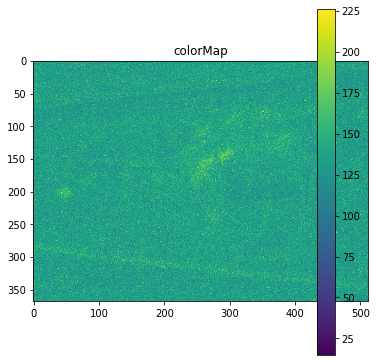

In [35]:
# added some commas and array creation code

fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(framesArray[119,:,:,25])
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

In [8]:
from tensorflow.keras import backend as K
K.tensorflow_backend._get_available_gpus()

AttributeError: module 'tensorflow_core.keras.backend' has no attribute 'tensorflow_backend'